### Electric Vehicle Price Prediction
`Prasad Jadhav`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

import pickle

In [2]:
df = pd.read_csv('electric_vehicle.csv')

#### Data Overview
- VIN (1-10) - The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
- County- The county in which the registered owner resides.
- City - The city in which the registered owner resides.
- State- The state in which the registered owner resides.
- ZIP Code - The 5-digit zip code in which the registered owner resides.
- Model Year - The model year of the vehicle is determined by decoding the Vehicle Identification Number (VIN).
- Make- The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
- Model- The model of the vehicle is determined by decoding the Vehicle Identification Number (VIN).
- Electric Vehicle Type - This distinguishes the vehicle as all-electric or a plug-in hybrid.
- Clean Alternative Fuel Vehicle (CAFV) Eligibility - This categorizes vehicles as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement.
- Electric Range - Describes how far a vehicle can travel purely on its electric charge.
- Base MSRP - This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
- Legislative District - The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
- DOL Vehicle ID - Unique number assigned to each vehicle by the Department of Licensing for identification purposes.
- Vehicle Location - The center of the ZIP Code for the registered vehicle.
- Electric Utility - This is the electric power retail service territory serving the address of the registered vehicle.
- Expected Price - This is the expected price of the vehicle.

In [3]:
df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [4]:
df.tail()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,156575107,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,27.0,211048701,POINT (-122.443211 47.252172),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,13.3
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,135543411,POINT (-122.367721 47.639264),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),22.857
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,46.0,192459907,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.7
64352,EV11120,1N4BZ1CP8K,Lewis,TOLEDO,WA,98591.0,2019.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,20.0,477551595,POINT (-122.800917 46.444012),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,35


In [5]:
df.shape

(64353, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [7]:
# df.isnull().sum()

In [8]:
# df.duplicated().sum()

In [9]:
df['Make'].value_counts()

TESLA                   27903
NISSAN                   8678
CHEVROLET                6651
FORD                     3850
KIA                      3066
BMW                      2707
TOYOTA                   2700
AUDI                     1265
VOLKSWAGEN               1217
CHRYSLER                 1091
HYUNDAI                   894
VOLVO                     688
FIAT                      561
HONDA                     528
PORSCHE                   455
JEEP                      436
MITSUBISHI                376
MINI                      303
MERCEDES-BENZ             248
SMART                     192
POLESTAR                  164
JAGUAR                    142
CADILLAC                   69
LINCOLN                    59
SUBARU                     34
LAND ROVER                 26
RIVIAN                     26
FISKER                     11
AZURE DYNAMICS              3
LUCID MOTORS                2
TH!NK                       1
DODGE                       1
WHEEGO ELECTRIC CARS        1
BENTLEY   

In [10]:
df['Model'].value_counts()

MODEL 3                 13138
LEAF                     8679
MODEL Y                  7622
MODEL S                  4710
VOLT                     3420
                        ...  
A8 E                        1
LIFE                        1
BENTAYGA                    1
918 SPYDER                  1
PRIUS PLUG-IN HYBRID        1
Name: Model, Length: 107, dtype: int64

In [11]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            47869
Plug-in Hybrid Electric Vehicle (PHEV)    16484
Name: Electric Vehicle Type, dtype: int64

In [12]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         39948
Eligibility unknown as battery range has not been researched    14938
Not eligible due to low battery range                            9467
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [13]:
df['Electric Range'].value_counts()

0      14938
215     4353
84      2840
220     2831
238     2545
       ...  
95         2
74         2
48         2
80         1
57         1
Name: Electric Range, Length: 98, dtype: int64

In [14]:
df['Base MSRP'].value_counts()

0         61263
69900      1062
34600       359
31950       305
28500       148
52900       143
38500       127
32250       113
59900       105
54950       101
39995        79
33950        64
44100        63
36900        56
64950        51
45600        42
36800        40
52650        38
34995        34
55700        31
98950        14
110950       14
53400        14
75095        12
90700        12
102000       11
81100        11
35390         9
184400        9
43700         7
109000        6
89100         5
66300         1
91250         1
32995         1
845000        1
32000         1
Name: Base MSRP, dtype: int64

In [15]:
df['Legislative District'].value_counts()

41.0    4292
45.0    4160
48.0    3786
36.0    3047
46.0    2782
43.0    2749
1.0     2607
5.0     2604
37.0    2092
34.0    2041
22.0    1682
18.0    1664
32.0    1588
40.0    1578
23.0    1575
21.0    1491
44.0    1468
11.0    1415
26.0    1289
10.0    1229
17.0    1076
31.0    1025
42.0     984
24.0     976
47.0     976
27.0     966
49.0     930
35.0     918
33.0     862
28.0     833
39.0     813
30.0     730
2.0      704
8.0      697
38.0     642
20.0     623
25.0     608
6.0      580
12.0     573
4.0      474
19.0     414
13.0     402
29.0     397
14.0     387
9.0      341
3.0      340
16.0     330
7.0      282
15.0     156
0.0        6
Name: Legislative District, dtype: int64

In [16]:
df['Electric Utility'].value_counts()

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               22555
PUGET SOUND ENERGY INC                                                                      12790
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                12514
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                             3768
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              2899
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA)                                      2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY        2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY        1
AVISTA CORP||INLAND POWER & LIGHT COMPANY                                                       1
CITY OF SEATTLE - (W

In [17]:
df['County'].unique()

array(['Snohomish', 'Skagit', 'Pierce', 'King', 'Clark', 'Spokane',
       'Island', 'Klickitat', 'Douglas', 'Jefferson', 'Whatcom',
       'San Juan', 'Kitsap', 'Stevens', 'Thurston', 'Cumberland', 'Grant',
       'Yakima', 'Benton', 'Cowlitz', 'Lewis', 'Kittitas', 'Chelan',
       'Mason', 'Franklin', 'Adams', 'Walla Walla', 'Clallam', 'Whitman',
       'Pacific', 'Asotin', 'Marin', 'Ferry', 'Skamania', 'Okanogan',
       'Columbia', 'Montgomery', 'Grays Harbor', 'Lake', nan, 'Anchorage',
       'Pend Oreille', 'Otero', 'Orange', 'San Diego', 'Los Angeles',
       'Queens', 'Frederick', 'Lincoln', 'Wahkiakum', 'Fairfax',
       'Honolulu', 'San Bernardino', 'New London', 'Muscogee', 'Bradley',
       'Davidson', 'El Paso', 'Liberty', 'District Of Columbia',
       'Calvert', 'Kings', 'Charles', 'Harrison', 'Chesapeake City',
       'Coryell', 'Riverside', 'Newport', 'Allegheny', 'Prince Georges',
       'Santa Clara', 'Howard', 'Stafford', 'Goochland', 'Laramie',
       'Passaic', 'A

In [18]:
df['State'].unique()

array(['WA', 'NC', 'CA', nan, 'PA', 'IL', 'AE', 'NM', 'NY', 'MD', 'AP',
       'VA', 'HI', 'CT', 'GA', 'TN', 'TX', 'DC', 'MS', 'RI', 'NE', 'NV',
       'IN', 'WY', 'NJ', 'DE', 'KS', 'AK', 'OR', 'FL', 'PR', 'MA', 'MO',
       'SD', 'MT', 'UT', 'LA', 'WI', 'AZ'], dtype=object)

In [19]:
df['City'].unique()

array(['LYNNWOOD', 'BELLINGHAM', 'TACOMA', 'REDMOND', 'PUYALLUP',
       'VANCOUVER', 'SEATTLE', 'SPOKANE', 'BOTHELL', 'KENMORE',
       'SAMMAMISH', 'COUPEVILLE', 'WHITE SALMON', 'MUKILTEO',
       'UNIVERSITY PLACE', 'COVINGTON', 'CLYDE HILL', 'STANWOOD',
       'AUBURN', 'KIRKLAND', 'LAKE FOREST PARK', 'EAST WENATCHEE',
       'PORT TOWNSEND', 'FERNDALE', 'SHORELINE', 'ISSAQUAH', 'EDMONDS',
       'LAKEWOOD', 'SPOKANE VALLEY', 'LAKE TAPPS', 'MERCER ISLAND',
       'SNOQUALMIE', 'DEER HARBOR', 'SILVERDALE', 'BONNEY LAKE',
       'BELLEVUE', 'RIDGEFIELD', 'COLVILLE', 'FRIDAY HARBOR', 'YELM',
       'BURIEN', 'FAYETTEVILLE', 'EPHRATA', 'LUMMI ISLAND',
       'BATTLE GROUND', 'LYNDEN', 'TIETON', 'MARYSVILLE', 'SEATAC',
       'PORT ORCHARD', 'PROSSER', 'OLYMPIA', 'RENTON', 'KELSO',
       'CENTRALIA', 'NEWCASTLE', 'DUVALL', 'BREMERTON',
       'BAINBRIDGE ISLAND', 'CLE ELUM', 'LEAVENWORTH', 'CARNATION',
       'YAKIMA', 'EVERETT', 'CHEHALIS', 'SNOHOMISH', 'KENT', 'CAMAS',
       'LACEY'

In [20]:
 # Model                                              
 # Electric Vehicle Type                              
 # Clean Alternative Fuel Vehicle (CAFV) Eligibility   
 # Electric Range                                     
 # Base MSRP                                          
 # Legislative District                               
 # Expected Price ($1k)   

In [21]:
df = df.drop(columns = ['State', 'City', 'Make', 'County', 'ZIP Code', 
                                       'ID', 'VIN (1-10)', 'Vehicle Location', 'DOL Vehicle ID', 
                                       'Electric Utility', 'Model'])

In [22]:
df.isnull().sum()

Model Year                                             7
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
Expected Price ($1k)                                   0
dtype: int64

In [23]:
df.duplicated().sum()

55632

In [24]:
df = df.dropna()

In [25]:
df = df.drop_duplicates()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8639 entries, 0 to 64343
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         8639 non-null   float64
 1   Electric Vehicle Type                              8639 non-null   object 
 2   Clean Alternative Fuel Vehicle (CAFV) Eligibility  8639 non-null   object 
 3   Electric Range                                     8639 non-null   int64  
 4   Base MSRP                                          8639 non-null   int64  
 5   Legislative District                               8639 non-null   float64
 6   Expected Price ($1k)                               8639 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 539.9+ KB


In [27]:
df['Year'] = df['Model Year'].astype(int)
df['Legislative District'] = df['Legislative District'].astype(int)

In [28]:
df['Expected Price ($1k)'] = df['Expected Price ($1k)'].replace('N/', np.NaN)

In [29]:
# df['Expected Price ($1k)'] = df['Expected Price ($1k)'].astype(float)

In [30]:
df.describe()

,Model Year,Electric Range,Base MSRP,Legislative District,Year
count,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000
mean,2017.912490,79.683297,4936.788980,26.764093,2017.912490
std,2.910883,89.967808,18924.606185,14.302350,2.910883
min,1993.000000,0.000000,0.000000,0.000000,1993.000000
25%,2016.000000,17.000000,0.000000,15.000000,2016.000000
50%,2018.000000,33.000000,0.000000,28.000000,2018.000000
75%,2020.000000,107.000000,0.000000,40.000000,2020.000000
max,2022.000000,337.000000,845000.000000,49.000000,2022.000000


In [31]:
df.corr()

,Model Year,Electric Range,Base MSRP,Legislative District,Year
Model Year,1.000000,-0.041952,-0.157029,0.007643,1.000000
Electric Range,-0.041952,1.000000,0.039578,-0.018532,-0.041952
Base MSRP,-0.157029,0.039578,1.000000,0.013656,-0.157029
Legislative District,0.007643,-0.018532,0.013656,1.000000,0.007643
Year,1.000000,-0.041952,-0.157029,0.007643,1.000000


In [32]:
df['Expected Price ($1k)'] = pd.to_numeric(df['Expected Price ($1k)'])

In [33]:
# df['Expected Price ($1k)'] = df['Expected Price ($1k)'] * 1000.0

In [34]:
# percentile = np.percentile(df['Expected Price ($1k)'], [98])[0]

In [35]:
# df = df[(df['Expected Price ($1k)'] < percentile)]

In [36]:
# sns.histplot(x = df['Expected Price ($1k)'])

<AxesSubplot:>

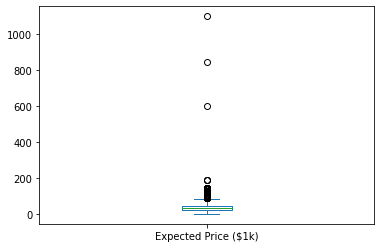

In [37]:
df['Expected Price ($1k)'].plot(kind='box')

<AxesSubplot:>

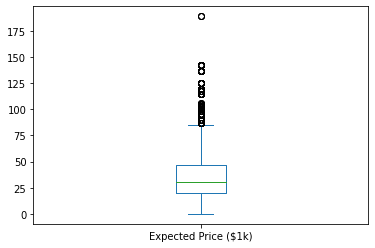

In [38]:
df = df[df['Expected Price ($1k)']<200]
df['Expected Price ($1k)'].plot(kind='box')

In [39]:
df = df.drop(columns=['Model Year'])

In [40]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            4538
Plug-in Hybrid Electric Vehicle (PHEV)    4086
Name: Electric Vehicle Type, dtype: int64

In [41]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         4610
Not eligible due to low battery range                           2840
Eligibility unknown as battery range has not been researched    1174
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [42]:
# Battery Electric Vehicle (BEV) : 1
# Plug-in Hybrid Electric Vehicle (PHEV) : 0

df['Electric Vehicle Type'] = df['Electric Vehicle Type'].map({'Battery Electric Vehicle (BEV)':1,
                                                               'Plug-in Hybrid Electric Vehicle (PHEV)':0})

In [43]:
# Clean Alternative Fuel Vehicle Eligible : 1
# Not eligible due to low battery range : 2
# Eligibility unknown as battery range has not been researched : 0

df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map({'Clean Alternative Fuel Vehicle Eligible':1,
                                                                                                                        'Not eligible due to low battery range':2,
                                                                                                                        'Eligibility unknown as battery range has not been researched':0})

In [44]:
df['Electric Vehicle Type'].value_counts()

1    4538
0    4086
Name: Electric Vehicle Type, dtype: int64

In [45]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

1    4610
2    2840
0    1174
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [46]:
X = df.drop('Expected Price ($1k)',axis=1)
y = df['Expected Price ($1k)']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [49]:
y_pred_1 = lr.predict(X_test)
y_pred_2 = rf.predict(X_test)
y_pred_3 = gb.predict(X_test)
y_pred_4 = xg.predict(X_test)

In [50]:
score_1 = metrics.r2_score(y_test,y_pred_1)
score_2 = metrics.r2_score(y_test,y_pred_2)
score_3 = metrics.r2_score(y_test,y_pred_3)
score_4 = metrics.r2_score(y_test,y_pred_4)

In [51]:
print(score_1,score_2,score_3,score_4)

0.29387620914829515 0.6222151397955471 0.6418527275447143 0.6566022692548229


In [68]:
predict_df = pd.DataFrame({'Models':['LR','RF','GB','XG'],
              'R2_Score':[score_1,score_2,score_3,score_4]})
predict_df

,Models,R2_Score
0,LR,0.293876
1,RF,0.622215
2,GB,0.641853
3,XG,0.656602


In [53]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xg_1 = XGBRegressor(random_state=15,verbosity=0,silent=0)
rcv = RandomizedSearchCV(estimator=xg_1,param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=1, random_state=15, n_jobs=-1)

rcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=15, verbose=1)

In [54]:
y_pred_5 = rcv.predict(X_test)

In [55]:
score_5 = metrics.r2_score(y_test,y_pred_5)

In [56]:
print(score_5)

0.6925875247348816


In [57]:
dt = DecisionTreeRegressor()

param = {
    'max_depth':[6,9,12,15],
    'min_samples_leaf':[10,50,100,150]
}

random_search = RandomizedSearchCV(dt,param_distributions=param,
                                 n_iter=5,
                                 n_jobs=-1,cv=5,verbose=3)

dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

random_search.fit(X,y)

means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.640902 with: {'min_samples_leaf': 50, 'max_depth': 15}
0.641030 with: {'min_samples_leaf': 50, 'max_depth': 9}
0.711968 with: {'min_samples_leaf': 10, 'max_depth': 9}
0.529773 with: {'min_samples_leaf': 150, 'max_depth': 9}
Best parameters with the minimum Mean Square Error are: {'min_samples_leaf': 150, 'max_depth': 9}
0.650304 with: {'min_samples_leaf': 10, 'max_depth': 6}
R2_Score 0.66698819033353
MAE 7.431482244133794


In [58]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

xgb_0 = XGBRegressor()

random_search_1 = RandomizedSearchCV(xgb_0,param_distributions=params,
                                 n_iter=5,scoring='neg_mean_squared_error',
                                 n_jobs=-1,cv=5,verbose=3)

random_search_1.fit(X,y)

means = random_search_1.cv_results_['mean_test_score']
params = random_search_1.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
-201.743857 with: {'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.7}
-202.769126 with: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.3}
-203.798411 with: {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.5}
-191.529649 with: {'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.4}
-203.833578 with: {'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.3}
Best parameters with the minimum Mean Square Error are: {'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.3}


In [59]:
xgb_2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgb_2.fit(X,y)
y_pred = xgb_2.predict(X)

score = r2_score(y,y_pred)
print("Score of Training:",100*score)
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

cv_score = cross_val_score(xgb_2,X, y, cv=20, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
    
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

Score of Training: 77.29714475254163
MAE : 2.03
RMSE : 11.98

Model Report
RMSE : 11.98
CV Score : Mean - 15.09 | Std - 1.216 | Min - 13.11 | Max - 17.52


In [60]:
y_pred = xgb_2.predict(X_train)
score = r2_score(y_train,y_pred)
print("Score of Training:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))

Score of Training: 78.05778584549157
RMSE : 11.74


In [61]:
# cv_score = cross_val_score(xgb2,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
# cv_score = np.sqrt(np.abs(cv_score))

# print("\nModel Report")
# print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
# print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

# y_test_pred = xgb2.predict(X_test)
# score = r2_score(y_test,y_test_pred)
# print("Score of Testing:",100*score)
# print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test,y_test_pred)))
# cv_score = cross_val_score(xgb2,X_test, y_test, cv=20, scoring = make_scorer(mean_squared_error))
# cv_score = np.sqrt(np.abs(cv_score))
   
# print("\nModel Report")
# print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test,y_test_pred)))
# print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [62]:
pickle.dump(xgb_2,open('electric_vehicle_price_predictor.pkl','wb'))

In [63]:
model = pickle.load(open('electric_vehicle_price_predictor.pkl','rb'))

In [67]:
df.to_csv('electric_vehicle_clean.csv')

In [66]:
print('Enter Vehicle Details')

vehicle_type = int(input('Enter the Vehicle Type: '))
cafv_eligibility = int(input('Enter the CAFV Eligibility: '))
e_range = int(input('Enter the Electric Range: '))
msrp = int(input('Enter the Base MSRP: '))
legislative_district = int(input('Enter the Legislative District: '))
year = int(input('Enter the Year: '))

input_point = np.array([[vehicle_type, cafv_eligibility, e_range, msrp, legislative_district, year]])

model.predict(input_point)

Enter Vehicle Details
Enter the Vehicle Type: 1
Enter the CAFV Eligibility: 1
Enter the Electric Range: 308
Enter the Base MSRP: 0
Enter the Legislative District: 32
Enter the Year: 2020


array([50.019276], dtype=float32)

#### Thank You!